In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
ls

CO vs UT.ipynb                       colorado_topics.csv
Colorado.ipynb                       df_reddit_extend_after2021.feather
DF_SUBSETS.ipynb                     df_reddit_extend_before2021.pkl
EV Tweets.zip                        feather format/
EV-Consumer-Behavior-Report.pdf      fol/
EVDemographicAnalysis.docx           fol110
EV_data_preprocessing.ipynb          fol110.html
Female Topic Modeling-Copy1.ipynb    fol15
Female Topic Modeling.ipynb          fol15.html
HugeFile-DoNotOpenonLocalHost.ipynb  left.csv
IS-Fall22 [Autosaved].pptx           leftDS.csv
Left_sent.csv                        male Topic Modeling-Copy1.ipynb
M3Predictions.ipynb                  male Topic Modeling.ipynb
PoliticalEV-right.ipynb              reddit-Copy1.ipynb
PoliticalEV_left.ipynb               reddit.ipynb
Right_sent.csv                       right.csv
States Topic Modeling.ipynb          rightDS.csv
TopicModel.ipynb                     sample_reddit.csv
Untitled1-Copy1.ipynb                sta

In [21]:
len(left)

6162

In [22]:
len(right)

17843

In [19]:
left = pd.read_csv("leftDS.csv")

In [20]:
right = pd.read_csv("rightDS.csv")

/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_11622/3612830911.py:1: DtypeWarning: Columns (5,15,17,18,19,30,32,33,36,40,41,53,54,57,63,65,69,73,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  right = pd.read_csv("rightDS.csv")


In [3]:
left = left[['author','body','score']]

NameError: name 'left' is not defined

In [4]:
right = right[['author','body','score']]

In [5]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tavishipriyam/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
left['sent'] = left['body'].apply(lambda review: sid.polarity_scores(review))

In [9]:
left['compound']  = left['sent'].apply(lambda score_dict: score_dict['compound'])

left.head()

,author,body,score,sent,compound
0,dumstarbuxguy,Winning the state also probably gave a few clo...,4.0,"{'neg': 0.149, 'neu': 0.688, 'pos': 0.163, 'co...",-0.0387
1,unsmartnerd,I'm really excited for cultured meat to take a...,11.0,"{'neg': 0.019, 'neu': 0.941, 'pos': 0.039, 'co...",0.1893
2,drwho_who,"if it doesn't fit their bubble view, it's all ...",3.0,"{'neg': 0.212, 'neu': 0.635, 'pos': 0.153, 'co...",-0.2982
3,Tsee-Kah,Save yourself! Don't bother. You can't reason ...,3.0,"{'neg': 0.0, 'neu': 0.591, 'pos': 0.409, 'comp...",0.6734
4,[deleted],[removed],1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [10]:
left['comp_score'] = left['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

left.head()

,author,body,score,sent,compound,comp_score
0,dumstarbuxguy,Winning the state also probably gave a few clo...,4.0,"{'neg': 0.149, 'neu': 0.688, 'pos': 0.163, 'co...",-0.0387,neg
1,unsmartnerd,I'm really excited for cultured meat to take a...,11.0,"{'neg': 0.019, 'neu': 0.941, 'pos': 0.039, 'co...",0.1893,pos
2,drwho_who,"if it doesn't fit their bubble view, it's all ...",3.0,"{'neg': 0.212, 'neu': 0.635, 'pos': 0.153, 'co...",-0.2982,neg
3,Tsee-Kah,Save yourself! Don't bother. You can't reason ...,3.0,"{'neg': 0.0, 'neu': 0.591, 'pos': 0.409, 'comp...",0.6734,pos
4,[deleted],[removed],1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos


In [11]:
left

,author,body,score,sent,compound,comp_score
0,dumstarbuxguy,Winning the state also probably gave a few clo...,4.0,"{'neg': 0.149, 'neu': 0.688, 'pos': 0.163, 'co...",-0.0387,neg
1,unsmartnerd,I'm really excited for cultured meat to take a...,11.0,"{'neg': 0.019, 'neu': 0.941, 'pos': 0.039, 'co...",0.1893,pos
2,drwho_who,"if it doesn't fit their bubble view, it's all ...",3.0,"{'neg': 0.212, 'neu': 0.635, 'pos': 0.153, 'co...",-0.2982,neg
3,Tsee-Kah,Save yourself! Don't bother. You can't reason ...,3.0,"{'neg': 0.0, 'neu': 0.591, 'pos': 0.409, 'comp...",0.6734,pos
4,[deleted],[removed],1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
...,...,...,...,...,...,...
6157,Melopahn1,People should really have to read the articles...,4.0,"{'neg': 0.113, 'neu': 0.738, 'pos': 0.149, 'co...",0.9444,pos
6158,backpackwayne,\n•\t**11.3 million private sector jobs added*...,10.0,"{'neg': 0.069, 'neu': 0.83, 'pos': 0.1, 'compo...",0.9884,pos
6159,backpackwayne,\n•\t**11.3 million private sector jobs added*...,14.0,"{'neg': 0.069, 'neu': 0.83, 'pos': 0.1, 'compo...",0.9884,pos
6160,sclsmdsntwrk,&gt; Why do we have such a large prison popula...,1.0,"{'neg': 0.141, 'neu': 0.705, 'pos': 0.155, 'co...",-0.4523,neg


In [12]:
left['comp_score'].value_counts()

pos    4231
neg    1931
Name: comp_score, dtype: int64

## xxxxxxxxxxxxxxx

In [13]:
right['sent'] = right['body'].apply(lambda review: sid.polarity_scores(review))

In [14]:
right['compound']  = right['sent'].apply(lambda score_dict: score_dict['compound'])

right.head()

,author,body,score,sent,compound
0,JamySun,"For new era to begin, old need to retire. Mitc...",151.0,"{'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound...",0.9403
1,Imosa1,EV future?,8.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,Sen_Bulworth,Electric vehicles,14.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,Yosemite_Yam,Realistically will oil even be relevant by the...,11.0,"{'neg': 0.038, 'neu': 0.931, 'pos': 0.03, 'com...",-0.1189
4,Trumpologist,Fur Skin taking over the Senate and declaring ...,0.0,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'comp...",0.4404


In [15]:
right['comp_score'] = right['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

right.head()

,author,body,score,sent,compound,comp_score
0,JamySun,"For new era to begin, old need to retire. Mitc...",151.0,"{'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound...",0.9403,pos
1,Imosa1,EV future?,8.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
2,Sen_Bulworth,Electric vehicles,14.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
3,Yosemite_Yam,Realistically will oil even be relevant by the...,11.0,"{'neg': 0.038, 'neu': 0.931, 'pos': 0.03, 'com...",-0.1189,neg
4,Trumpologist,Fur Skin taking over the Senate and declaring ...,0.0,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'comp...",0.4404,pos


In [24]:
right

,author,body,score,sent,compound,comp_score,neg
0,JamySun,"For new era to begin, old need to retire. Mitc...",151.0,"{'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound...",0.9403,pos,0.0
1,Imosa1,EV future?,8.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.0
2,Sen_Bulworth,Electric vehicles,14.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.0
3,Yosemite_Yam,Realistically will oil even be relevant by the...,11.0,"{'neg': 0.038, 'neu': 0.931, 'pos': 0.03, 'com...",-0.1189,neg,0.0
4,Trumpologist,Fur Skin taking over the Senate and declaring ...,0.0,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'comp...",0.4404,pos,0.0
...,...,...,...,...,...,...,...
17838,konradsz,So I work in the automotive field... and this ...,8.0,"{'neg': 0.069, 'neu': 0.9, 'pos': 0.03, 'compo...",-0.4472,neg,0.0
17839,ohmanitstheman,"Well, it’s expected most recharging of EV’s wi...",6.0,"{'neg': 0.028, 'neu': 0.895, 'pos': 0.078, 'co...",0.4215,pos,0.0
17840,CuckMeWithFacts,A few things this author is forgetting. Most h...,5.0,"{'neg': 0.081, 'neu': 0.859, 'pos': 0.06, 'com...",-0.3212,neg,0.0
17841,paamedvanten,I hate it when I have to wait in line to charg...,3.0,"{'neg': 0.188, 'neu': 0.812, 'pos': 0.0, 'comp...",-0.5719,neg,0.0


In [17]:
right['comp_score'].value_counts()

pos    12628
neg     5215
Name: comp_score, dtype: int64

In [32]:
right['pos'] = 0

In [33]:
for i in range(len(right)):
    right['neg'].iloc[i] = right['sent'].iloc[i]['neg']
    right['neu'].iloc[i] = right['sent'].iloc[i]['neu']
    right['pos'].iloc[i] = right['sent'].iloc[i]['pos']

/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_49801/188679354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right['neg'].iloc[i] = right['sent'].iloc[i]['neg']
/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_49801/188679354.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right['pos'].iloc[i] = right['sent'].iloc[i]['pos']


In [40]:
left.to_csv("Left_sent.csv")

In [35]:
right.to_csv("Right_sent.csv")

In [34]:
right

,author,body,score,sent,compound,comp_score,neg,neu,pos
0,JamySun,"For new era to begin, old need to retire. Mitc...",151.0,"{'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound...",0.9403,pos,0.000,0.600,0.400
1,Imosa1,EV future?,8.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000,1.000,0.000
2,Sen_Bulworth,Electric vehicles,14.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000,1.000,0.000
3,Yosemite_Yam,Realistically will oil even be relevant by the...,11.0,"{'neg': 0.038, 'neu': 0.931, 'pos': 0.03, 'com...",-0.1189,neg,0.038,0.931,0.030
4,Trumpologist,Fur Skin taking over the Senate and declaring ...,0.0,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'comp...",0.4404,pos,0.000,0.884,0.116
...,...,...,...,...,...,...,...,...,...
17838,konradsz,So I work in the automotive field... and this ...,8.0,"{'neg': 0.069, 'neu': 0.9, 'pos': 0.03, 'compo...",-0.4472,neg,0.069,0.900,0.030
17839,ohmanitstheman,"Well, it’s expected most recharging of EV’s wi...",6.0,"{'neg': 0.028, 'neu': 0.895, 'pos': 0.078, 'co...",0.4215,pos,0.028,0.895,0.078
17840,CuckMeWithFacts,A few things this author is forgetting. Most h...,5.0,"{'neg': 0.081, 'neu': 0.859, 'pos': 0.06, 'com...",-0.3212,neg,0.081,0.859,0.060
17841,paamedvanten,I hate it when I have to wait in line to charg...,3.0,"{'neg': 0.188, 'neu': 0.812, 'pos': 0.0, 'comp...",-0.5719,neg,0.188,0.812,0.000


In [36]:
left['neg'] = 0
left['neu'] = 0
left['pos'] = 0

In [38]:
for i in range(len(left)):
    left['neg'].iloc[i] = left['sent'].iloc[i]['neg']
    left['neu'].iloc[i] = left['sent'].iloc[i]['neu']
    left['pos'].iloc[i] = left['sent'].iloc[i]['pos']

In [39]:
left

,author,body,score,sent,compound,comp_score,neg,neu,pos
0,dumstarbuxguy,Winning the state also probably gave a few clo...,4.0,"{'neg': 0.149, 'neu': 0.688, 'pos': 0.163, 'co...",-0.0387,neg,0.149,0.688,0.163
1,unsmartnerd,I'm really excited for cultured meat to take a...,11.0,"{'neg': 0.019, 'neu': 0.941, 'pos': 0.039, 'co...",0.1893,pos,0.019,0.941,0.039
2,drwho_who,"if it doesn't fit their bubble view, it's all ...",3.0,"{'neg': 0.212, 'neu': 0.635, 'pos': 0.153, 'co...",-0.2982,neg,0.212,0.635,0.153
3,Tsee-Kah,Save yourself! Don't bother. You can't reason ...,3.0,"{'neg': 0.0, 'neu': 0.591, 'pos': 0.409, 'comp...",0.6734,pos,0.000,0.591,0.409
4,[deleted],[removed],1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...
6157,Melopahn1,People should really have to read the articles...,4.0,"{'neg': 0.113, 'neu': 0.738, 'pos': 0.149, 'co...",0.9444,pos,0.113,0.738,0.149
6158,backpackwayne,\n•\t**11.3 million private sector jobs added*...,10.0,"{'neg': 0.069, 'neu': 0.83, 'pos': 0.1, 'compo...",0.9884,pos,0.069,0.830,0.100
6159,backpackwayne,\n•\t**11.3 million private sector jobs added*...,14.0,"{'neg': 0.069, 'neu': 0.83, 'pos': 0.1, 'compo...",0.9884,pos,0.069,0.830,0.100
6160,sclsmdsntwrk,&gt; Why do we have such a large prison popula...,1.0,"{'neg': 0.141, 'neu': 0.705, 'pos': 0.155, 'co...",-0.4523,neg,0.141,0.705,0.155


In [46]:
left

,author,body,score
0,dumstarbuxguy,Winning the state also probably gave a few clo...,4.0
1,unsmartnerd,I'm really excited for cultured meat to take a...,11.0
2,drwho_who,"if it doesn't fit their bubble view, it's all ...",3.0
3,Tsee-Kah,Save yourself! Don't bother. You can't reason ...,3.0
4,[deleted],[removed],1.0
...,...,...,...
6157,Melopahn1,People should really have to read the articles...,4.0
6158,backpackwayne,\n•\t**11.3 million private sector jobs added*...,10.0
6159,backpackwayne,\n•\t**11.3 million private sector jobs added*...,14.0
6160,sclsmdsntwrk,&gt; Why do we have such a large prison popula...,1.0


In [6]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tavishipriyam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['shodlurhj','http','https','zpxvxdlj','co','rt','ev','evs','electric','car','vehicle','from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [8]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data1 = right.body.values.tolist()
data_words1 = list(sent_to_words(data1))
print(data_words1[:1])

[['for', 'new', 'era', 'to', 'begin', 'old', 'need', 'to', 'retire', 'mitch', 'should', 'retire', 'am', 'republican', 'and', 'support', 'support', 'ev', 'future', 'support', 'smart', 'climate', 'friendly', 'industry', 'revolution', 'support', 'futuristic', 'tech', 'and', 'science']]


In [9]:
bigram = gensim.models.Phrases(data_words1, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words1], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready1 = process_words(data_words1) 

In [10]:
id2word = corpora.Dictionary(data_ready1)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready1]

# Build LDA model
lda_model1 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=10,
                                           per_word_topics=True)

pprint(lda_model1.print_topics())

[(0,
  '0.031*"state" + 0.017*"vote" + 0.017*"trump" + 0.016*"charge" + 0.012*"tax" '
  '+ 0.012*"mean" + 0.011*"look" + 0.010*"actually" + 0.009*"leave" + '
  '0.009*"place"'),
 (1,
  '0.029*"government" + 0.024*"oil" + 0.022*"money" + 0.021*"company" + '
  '0.017*"market" + 0.013*"business" + 0.012*"long" + 0.012*"increase" + '
  '0.011*"reason" + 0.011*"give"'),
 (2,
  '0.024*"power" + 0.023*"energy" + 0.017*"battery" + 0.012*"well" + '
  '0.011*"country" + 0.011*"plant" + 0.011*"point" + 0.010*"nuclear" + '
  '0.010*"green" + 0.009*"way"'),
 (3,
  '0.045*"people" + 0.026*"year" + 0.021*"gas" + 0.016*"pay" + 0.016*"work" + '
  '0.013*"cost" + 0.013*"time" + 0.012*"tesla" + 0.012*"buy" + 0.012*"high"')]


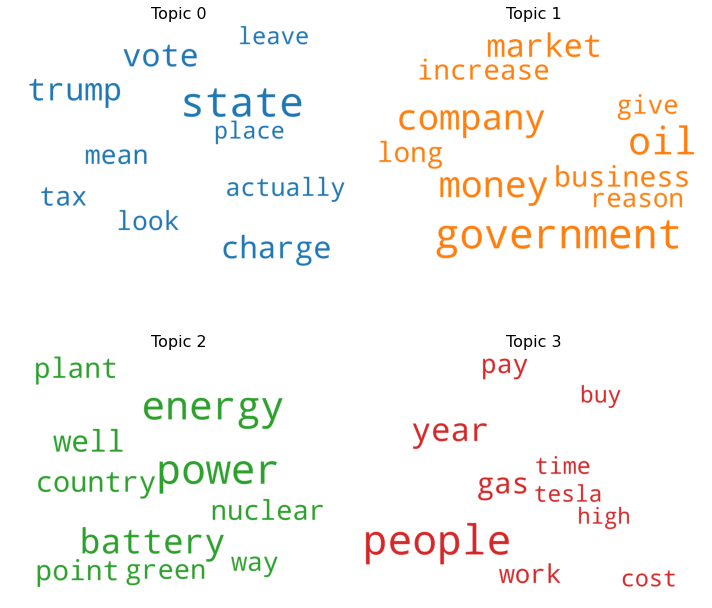

In [11]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model1.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_11622/1144229599.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_11622/1144229599.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_11622/1144229599.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_11622/1144229599.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalig

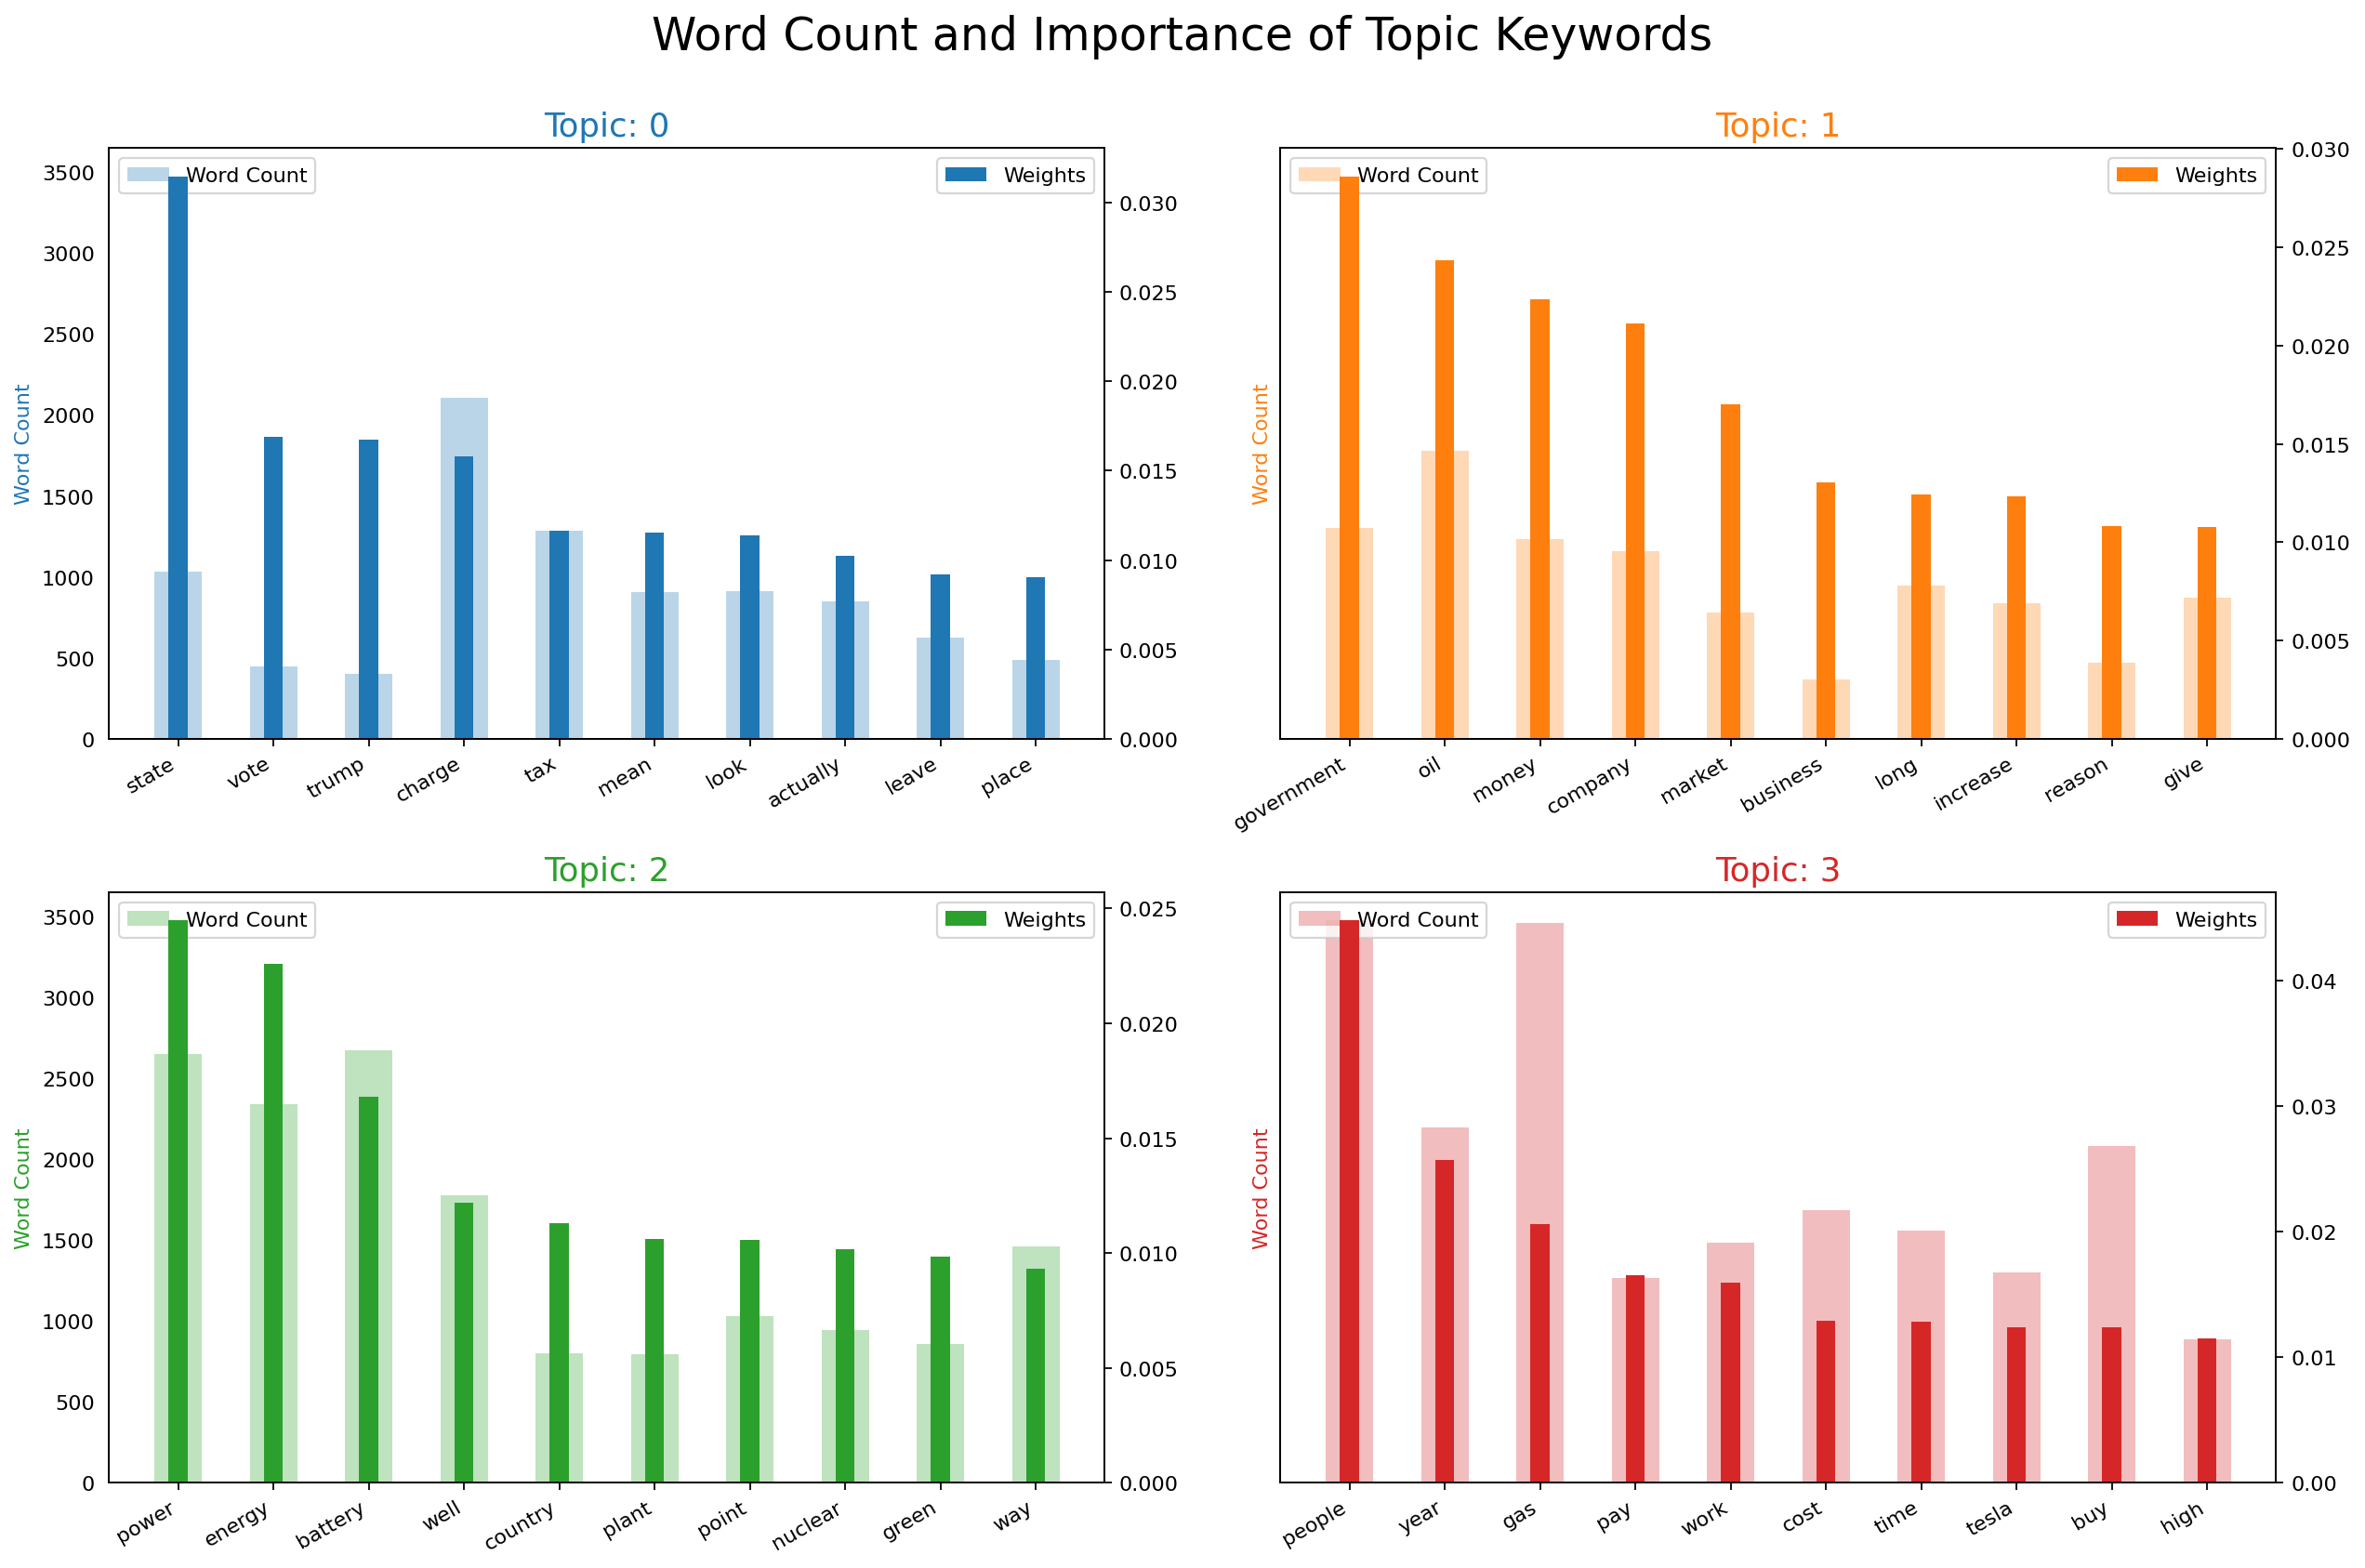

In [12]:
from collections import Counter
topics = lda_model1.show_topics(formatted=False)
data_flat = [w for w_list in data_ready1 for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
#     ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [13]:
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model1, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

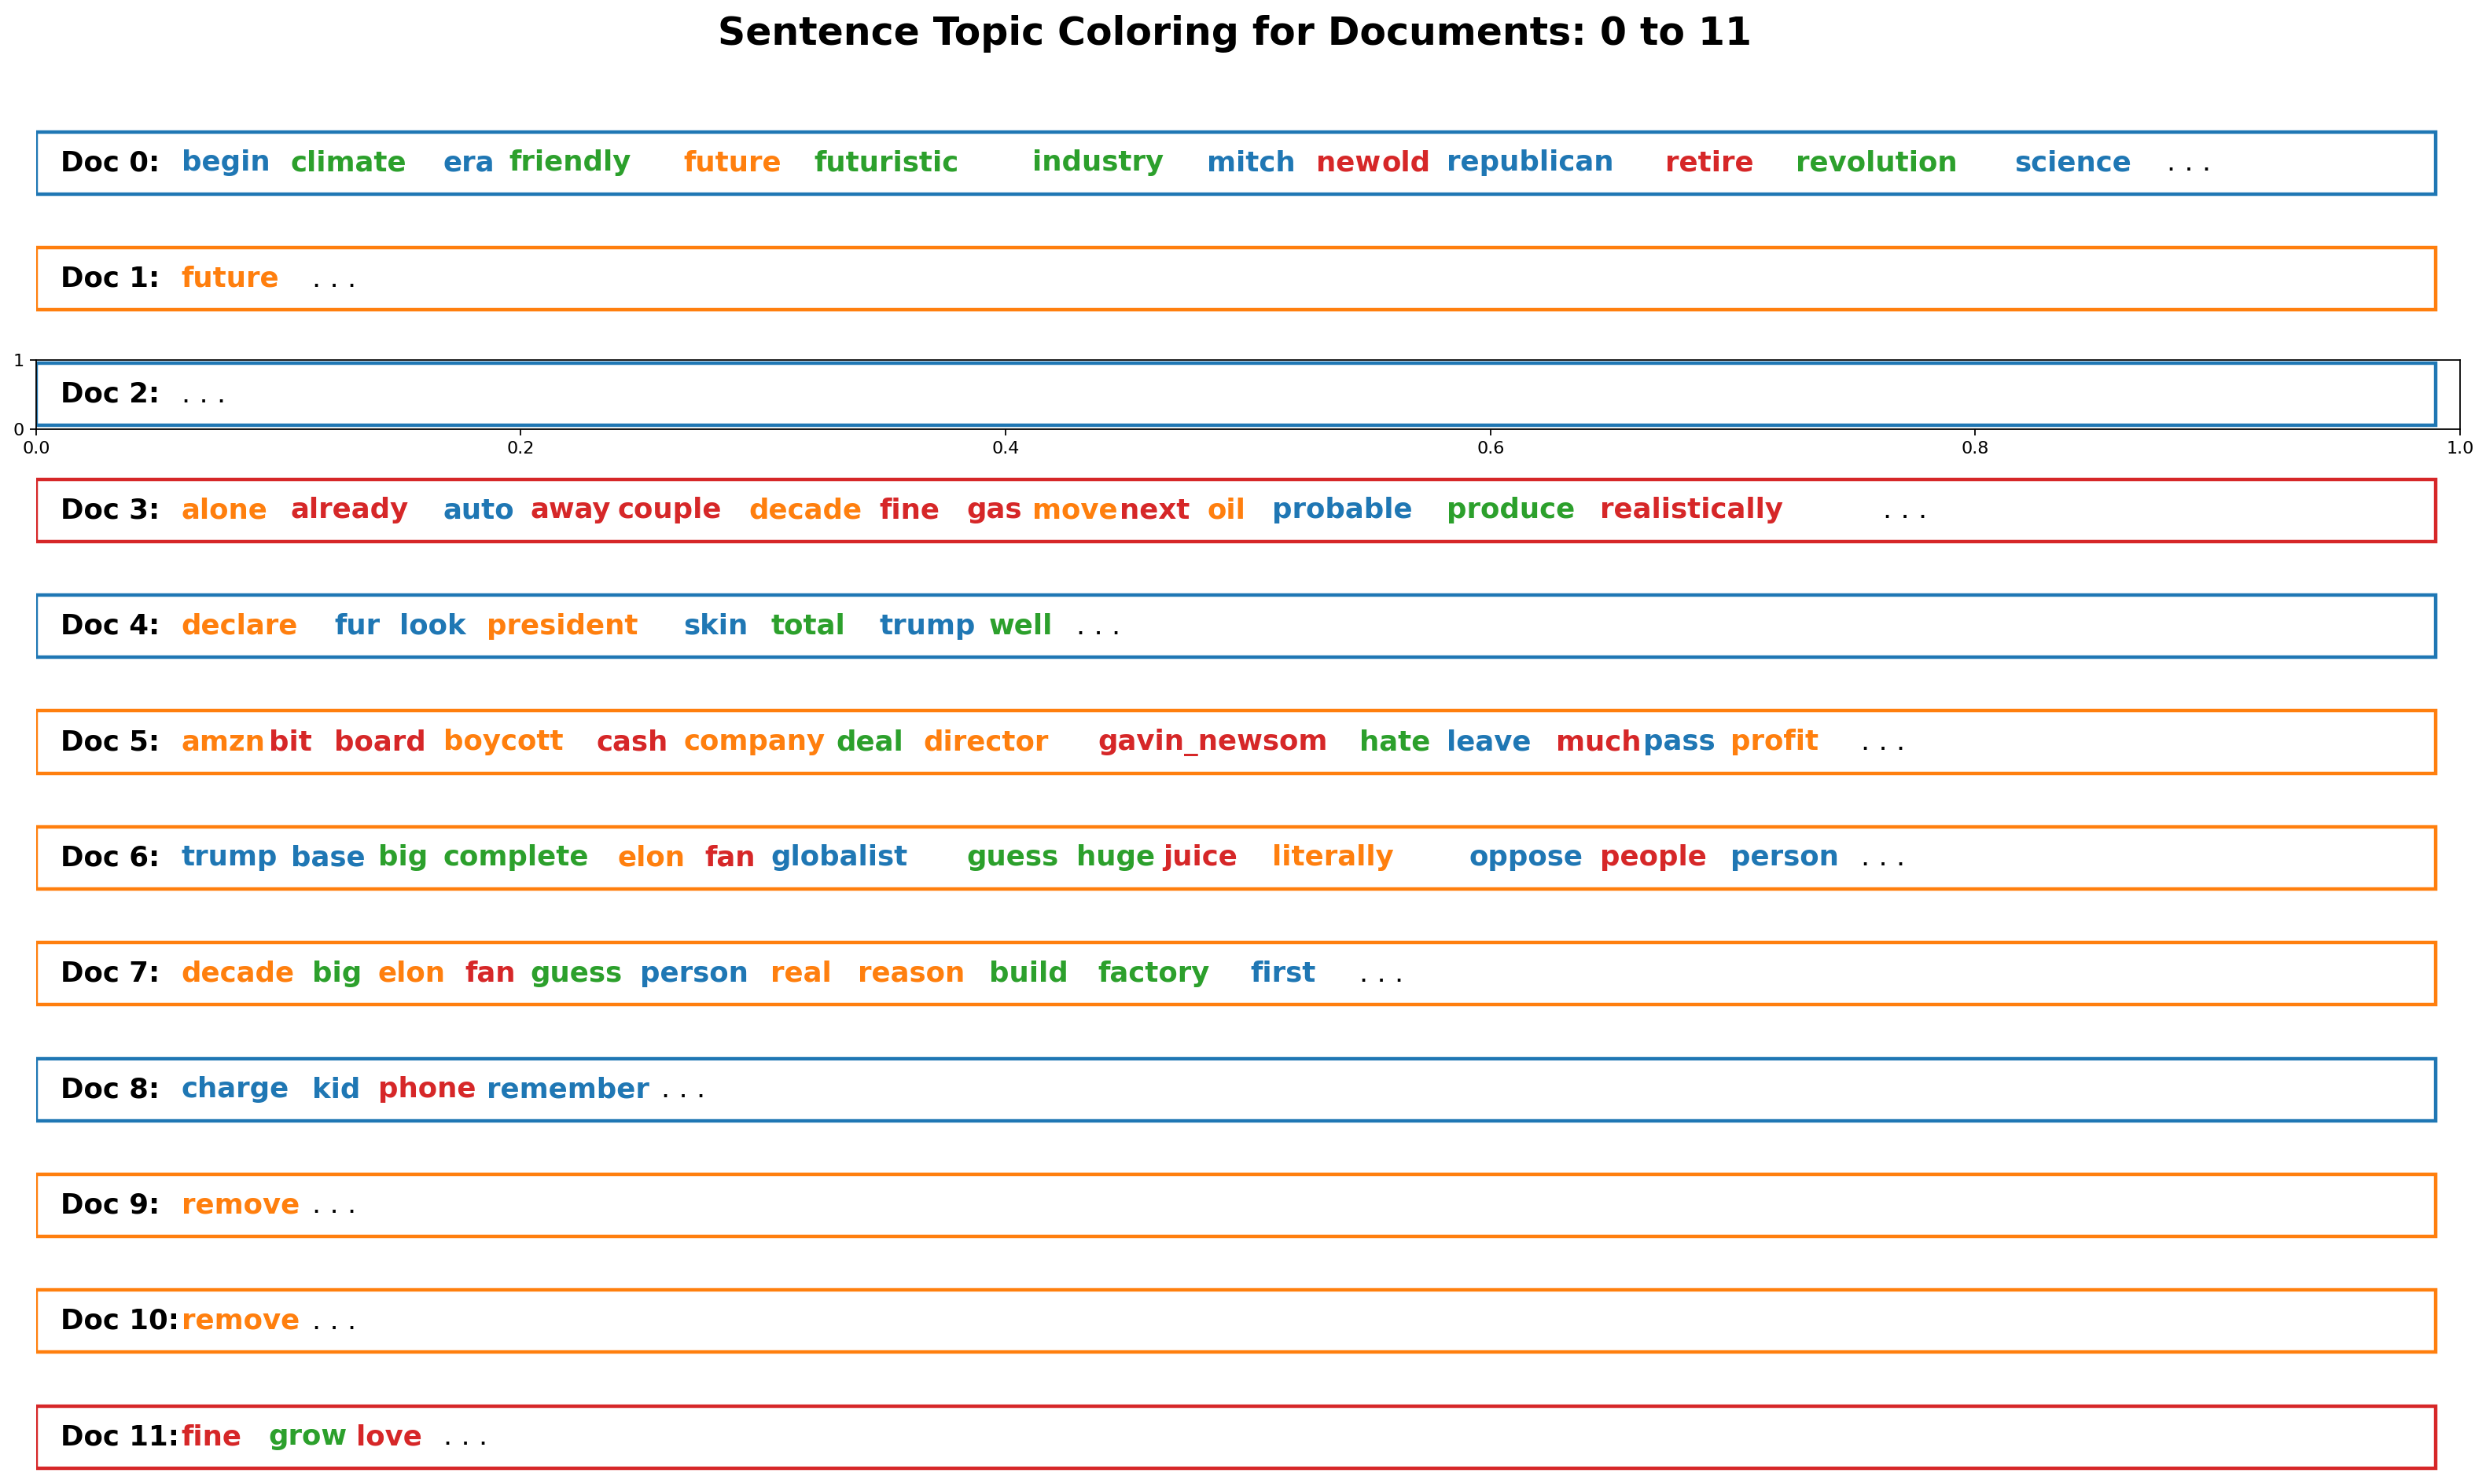

In [14]:
sentences_chart()  

In [15]:
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model1, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model1.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

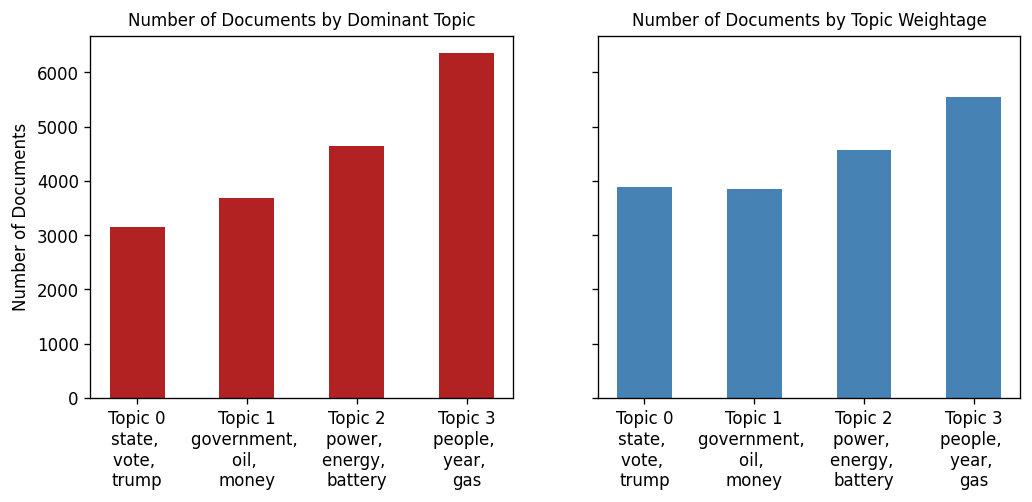

In [16]:
from matplotlib.ticker import FuncFormatter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
# ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()